## Player Analysis

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Cleaning and Exploring

In [2]:
df1 = pd.read_csv("matches.csv")
df2 = pd.read_csv("deliveries.csv")

df1.rename(columns={"id" : 'match_id'}, inplace=True)

matches= pd.merge(df1, df2, on='match_id', how='outer')

In [3]:
matches.columns

Index(['match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [ ]:
matches = matches[['match_id', 'season','team1', 'team2', 'toss_winner','toss_decision','winner',
       'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman','non_striker', 'bowler','wide_runs','noball_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind']]

matches.shape

In [5]:
matches.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,batsman,non_striker,bowler,wide_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,NaN,NaN
1,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,NaN,NaN
2,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,DA Warner,S Dhawan,TS Mills,0,0,4,0,4,NaN,NaN
3,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,NaN,NaN
4,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,DA Warner,S Dhawan,TS Mills,2,0,0,2,2,NaN,NaN


### Replacing Delhi Daredevils with Delhi Capitals

In [6]:
dicti = {"Delhi Daredevils":"Delhi Capitals"}
matches["team1"]=matches["team1"].replace(dicti)
matches["team2"]=matches["team2"].replace(dicti)
matches["toss_winner"]=matches["toss_winner"].replace(dicti)
matches["batting_team"]=matches["batting_team"].replace(dicti)
matches["bowling_team"]=matches["bowling_team"].replace(dicti)
matches["winner"]=matches["winner"].replace(dicti)

### Taking in consideration only DC VS CSK matches

In [8]:
CSK_DC=matches[np.logical_or(np.logical_and(matches['team1']=='Delhi Capitals',matches['team2']=='Chennai Super Kings'),
                            np.logical_and(matches['team2']=='Delhi Capitals',matches['team1']=='Chennai Super Kings'))]

In [12]:
CSK_DC.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,batsman,non_striker,bowler,wide_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
18372,79,2008,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,Delhi Capitals,1,Chennai Super Kings,Delhi Capitals,...,PA Patel,SP Fleming,GD McGrath,0,0,1,0,1,NaN,NaN
18373,79,2008,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,Delhi Capitals,1,Chennai Super Kings,Delhi Capitals,...,SP Fleming,PA Patel,GD McGrath,0,0,0,0,0,NaN,NaN
18374,79,2008,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,Delhi Capitals,1,Chennai Super Kings,Delhi Capitals,...,SP Fleming,PA Patel,GD McGrath,0,0,0,0,0,NaN,NaN
18375,79,2008,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,Delhi Capitals,1,Chennai Super Kings,Delhi Capitals,...,SP Fleming,PA Patel,GD McGrath,0,0,0,0,0,NaN,NaN
18376,79,2008,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,Delhi Capitals,1,Chennai Super Kings,Delhi Capitals,...,SP Fleming,PA Patel,GD McGrath,0,0,3,0,3,NaN,NaN


In [10]:
CSK_DC.batsman.unique()

array(['PA Patel', 'SP Fleming', 'S Vidyut', 'MS Dhoni', 'JA Morkel',
       'SK Raina', 'S Badrinath', 'G Gambhir', 'V Sehwag',
       'AB de Villiers', 'S Dhawan', 'Shoaib Malik', 'KD Karthik',
       'MK Tiwary', 'CK Kapugedera', 'MS Gony', 'TM Dilshan', 'ML Hayden',
       'A Flintoff', 'Joginder Sharma', 'M Muralitharan', 'M Vijay',
       'JDP Oram', 'SB Jakati', 'L Balaji', 'DA Warner', 'M Manhas',
       'R Bhatia', 'PJ Sangwan', 'A Mishra', 'JM Kemp', 'MEK Hussey',
       'R Ashwin', 'DE Bollinger', 'NV Ojha', 'CA Ingram', 'IK Pathan',
       'Y Venugopal Rao', 'JR Hopes', 'AB McDonald', 'Y Nagar',
       'F du Plessis', 'RA Jadeja', 'DJ Bravo', 'KP Pietersen',
       'DPMD Jayawardene', 'LRPL Taylor', 'AD Russell', 'P Negi',
       'Sunny Gupta', 'UT Yadav', 'VR Aaron', 'MC Juneja', 'KM Jadhav',
       'BMAJ Mendis', 'AB Agarkar', 'M Morkel', 'S Nadeem', 'J Botha',
       'UBT Chand', 'BJ Rohrer', 'RE van der Merwe', 'A Nehra', 'S Kaul',
       'DR Smith', 'BB McCullum', 'MA 

### Analysis of wicket CSK can take from 91 to 120th ball

In [82]:
overs = CSK_DC[(CSK_DC["over"]>15) & (CSK_DC["over"]<=20)]
chennai = overs[overs["bowling_team"]=="Chennai Super Kings"]

chennai.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,batsman,non_striker,bowler,wide_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
18591,79,2008,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,Delhi Capitals,2,Delhi Capitals,Chennai Super Kings,...,S Dhawan,AB de Villiers,M Ntini,0,0,0,0,0,NaN,NaN
18592,79,2008,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,Delhi Capitals,2,Delhi Capitals,Chennai Super Kings,...,S Dhawan,AB de Villiers,M Ntini,0,0,1,0,1,NaN,NaN
18593,79,2008,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,Delhi Capitals,2,Delhi Capitals,Chennai Super Kings,...,AB de Villiers,S Dhawan,M Ntini,0,0,2,0,2,NaN,NaN
18594,79,2008,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,Delhi Capitals,2,Delhi Capitals,Chennai Super Kings,...,AB de Villiers,S Dhawan,M Ntini,0,0,1,0,1,NaN,NaN
18595,79,2008,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,Delhi Capitals,2,Delhi Capitals,Chennai Super Kings,...,S Dhawan,AB de Villiers,M Ntini,0,0,1,0,1,NaN,NaN


In [84]:
chennai.match_id.unique()

array([   79,    87,   125,   141,   185,   224,   289,   364,   380,
         404,   446,   465,   483,   519,   565,  7923,  7945, 11141,
       11341, 11414], dtype=int64)

In [88]:
chennai.season.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2018, 2019],
      dtype=int64)

In [89]:
wicket_fall_per = chennai.groupby(["season","match_id"]).agg({"player_dismissed":"count"})

wicket_fall_per.columns = ["wicket fall"]


print("Wickets taken by CSK between 91-120th ball against DC(season wise) :")
wicket_fall_per

Wickets taken by CSK between 91-120th ball against DC(season wise) :


wicket fall
season match_id             
2008   79                  0
       87                  3
2009   125                 1
       141                 5
2010   185                 2
       224                 0
2011   289                 3
2012   364                 0
       380                 3
2013   404                 3
       446                 3
2014   465                 1
       483                 0
2015   519                 4
       565                 1
2018   7923                1
       7945                0
2019   11141               4
       11341               2
       11414               4

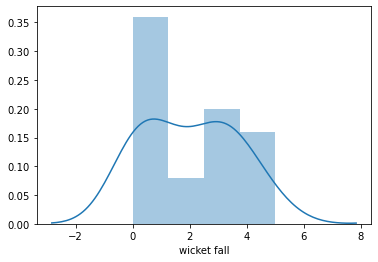

In [90]:
sns.distplot(wicket_fall_per["wicket fall"])

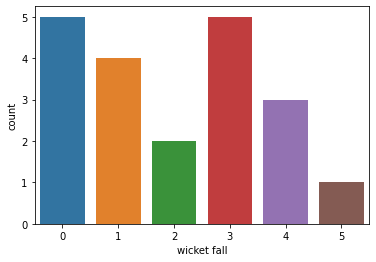

In [91]:
sns.countplot(wicket_fall_per["wicket fall"])

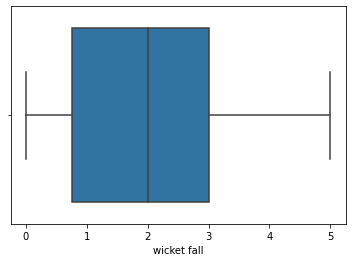

In [92]:
sns.boxplot(wicket_fall_per["wicket fall"])

In [93]:
print("Average no of wickets taken by CSK between 91th to 120th ball against DC :",round(wicket_fall_per["wicket fall"].mean()))

Average no of wickets taken by CSK between 91th to 120th ball against DC : 2


### Confidence Interval

In [94]:
wicket_fall_per.describe().T

,count,mean,std,min,25%,50%,75%,max
wicket fall,20.0,2.0,1.622214,0.0,0.75,2.0,3.0,5.0


In [95]:
mean = wicket_fall_per["wicket fall"].mean()
sd = wicket_fall_per["wicket fall"].std()
n = len(wicket_fall_per)

n

20

In [96]:
tstar = 2.064
se = sd/np.sqrt(n)
se

0.36273812505500586

In [100]:
lcb = mean - tstar * se
ucb = mean + tstar * se
lcb = round(lcb)
ucb = round(ucb)

print("So , our 95% Confidence Interval for wickets that CSK can take between 91-120th ball against DC :{}".format((lcb, ucb)))

So , our 95% Confidence Interval for wickets that CSK can take between 91-120th ball against DC :(1.0, 3.0)


### Total CSK runs analysis

In [144]:
Each_team_overall_score = pd.DataFrame(CSK_DC.groupby("batting_team")["total_runs"].sum())

Each_team_overall_score.columns=["Total Runs"]

print('Overall score for each team :')
Each_team_overall_score

Overall score for each team :


,Total Runs
batting_team,
Chennai Super Kings,3442
Delhi Capitals,3044


In [152]:
CSK_score = CSK_DC[CSK_DC["batting_team"]=="Chennai Super Kings"]

CSK_score.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,batsman,non_striker,bowler,wide_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
18372,79,2008,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,Delhi Capitals,1,Chennai Super Kings,Delhi Capitals,...,PA Patel,SP Fleming,GD McGrath,0,0,1,0,1,NaN,NaN
18373,79,2008,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,Delhi Capitals,1,Chennai Super Kings,Delhi Capitals,...,SP Fleming,PA Patel,GD McGrath,0,0,0,0,0,NaN,NaN
18374,79,2008,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,Delhi Capitals,1,Chennai Super Kings,Delhi Capitals,...,SP Fleming,PA Patel,GD McGrath,0,0,0,0,0,NaN,NaN
18375,79,2008,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,Delhi Capitals,1,Chennai Super Kings,Delhi Capitals,...,SP Fleming,PA Patel,GD McGrath,0,0,0,0,0,NaN,NaN
18376,79,2008,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,Delhi Capitals,1,Chennai Super Kings,Delhi Capitals,...,SP Fleming,PA Patel,GD McGrath,0,0,3,0,3,NaN,NaN


In [153]:
count = CSK_score.match_id.unique()
count = len(count)

Total_runs_scored = CSK_score.total_runs.sum()

Avg_score = Total_runs_scored/count

print("On an average runs scored by CSK :",round(Avg_score))

On an average runs scored by CSK : 164.0


In [154]:
pd.DataFrame(CSK_score.groupby(["inning"])["total_runs"].sum())

,total_runs
inning,
1,2139
2,1303


In [322]:
print("Inning wise run scored by CSK :")

pd.DataFrame(CSK_score.groupby(["inning","match_id"])["total_runs"].sum())

Inning wise run scored by CSK :


total_runs
inning match_id            
1      79               169
       141              163
       224              112
       289              176
       318              110
       380              222
       404              169
       446              168
       465              177
       519              150
       565              119
       7923             218
       11341            186
2      87               188
       125              180
       185              190
       364              115
       483              181
       7945             130
       11141            157
       11414            162

### FIrst Inning average score calculation

In [166]:
first_inning = CSK_score[CSK_score["inning"]==1]

first_inning.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,batsman,non_striker,bowler,wide_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
18372,79,2008,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,Delhi Capitals,1,Chennai Super Kings,Delhi Capitals,...,PA Patel,SP Fleming,GD McGrath,0,0,1,0,1,NaN,NaN
18373,79,2008,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,Delhi Capitals,1,Chennai Super Kings,Delhi Capitals,...,SP Fleming,PA Patel,GD McGrath,0,0,0,0,0,NaN,NaN
18374,79,2008,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,Delhi Capitals,1,Chennai Super Kings,Delhi Capitals,...,SP Fleming,PA Patel,GD McGrath,0,0,0,0,0,NaN,NaN
18375,79,2008,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,Delhi Capitals,1,Chennai Super Kings,Delhi Capitals,...,SP Fleming,PA Patel,GD McGrath,0,0,0,0,0,NaN,NaN
18376,79,2008,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,Delhi Capitals,1,Chennai Super Kings,Delhi Capitals,...,SP Fleming,PA Patel,GD McGrath,0,0,3,0,3,NaN,NaN


In [175]:
first_inning_runs = pd.DataFrame(first_inning.groupby(["season","match_id"])["total_runs"].sum())

first_inning_runs

total_runs
season match_id            
2008   79               169
2009   141              163
2010   224              112
2011   289              176
2012   318              110
       380              222
2013   404              169
       446              168
2014   465              177
2015   519              150
       565              119
2018   7923             218
2019   11341            186

In [178]:
count = first_inning.match_id.unique()
count = len(count)

Total_runs_scored = first_inning_runs.total_runs.sum()

Avg_score = Total_runs_scored/count

print("On an average runs scored by CSK in 1st innings :",round(Avg_score))

On an average runs scored by CSK in 1st innings : 165.0


### Second inning Score Calculation

In [168]:
second_inning = CSK_score[CSK_score["inning"]==2]

second_inning.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,batsman,non_striker,bowler,wide_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
20352,87,2008,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,2,Chennai Super Kings,Delhi Capitals,...,S Vidyut,SP Fleming,GD McGrath,0,0,4,0,4,NaN,NaN
20353,87,2008,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,2,Chennai Super Kings,Delhi Capitals,...,S Vidyut,SP Fleming,GD McGrath,0,0,0,0,0,NaN,NaN
20354,87,2008,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,2,Chennai Super Kings,Delhi Capitals,...,S Vidyut,SP Fleming,GD McGrath,0,0,4,0,4,NaN,NaN
20355,87,2008,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,2,Chennai Super Kings,Delhi Capitals,...,S Vidyut,SP Fleming,GD McGrath,0,0,0,0,0,NaN,NaN
20356,87,2008,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,2,Chennai Super Kings,Delhi Capitals,...,S Vidyut,SP Fleming,GD McGrath,0,0,1,0,1,NaN,NaN


In [169]:
second_inning_runs = pd.DataFrame(second_inning.groupby(["season","match_id"])["total_runs"].sum())

second_inning_runs

total_runs
season match_id            
2008   87               188
2009   125              180
2010   185              190
2012   364              115
2014   483              181
2018   7945             130
2019   11141            157
       11414            162

In [180]:
count = second_inning.match_id.unique()
count = len(count)

Total_runs_scored = second_inning_runs.total_runs.sum()

Avg_score = Total_runs_scored/count

print("On an average runs scored by CSK in 2nd innings :",round(Avg_score))

On an average runs scored by CSK in 2nd innings : 163.0


Based on all the analysis we can predict CSK to score about 170 runs

### No ball Analysis



In [324]:
nbcount = CSK_DC[CSK_DC["noball_runs"] >0]

In [325]:
nbcount.noball_runs.value_counts()

1    17
Name: noball_runs, dtype: int64

In [326]:
runs_from_noballs = nbcount.noball_runs.sum()

print("Runs from no ball delivery (overall) :",runs_from_noballs)

Runs from no ball delivery (overall) : 17


In [327]:
no_balls_per_match = pd.DataFrame(nbcount.groupby("match_id")["noball_runs"].count())

no_balls_per_match.columns = ["noball count"]


print("No balls bowled in RCB VS KXIP matches :")
no_balls_per_match

No balls bowled in RCB VS KXIP matches :


,noball count
match_id,
79,4
87,2
125,1
141,1
185,1
224,2
289,1
519,1
7923,1


In [331]:
count = CSK_DC.match_id.unique()
count = len(count)

total_no_balls = nbcount.noball_runs.count()

Avg_no_ball = total_no_balls/count

print("On an average , No Balls bowled in RCB VS KXIP matches (overall) :",round(Avg_no_ball))

On an average , No Balls bowled in RCB VS KXIP matches (overall) : 1.0


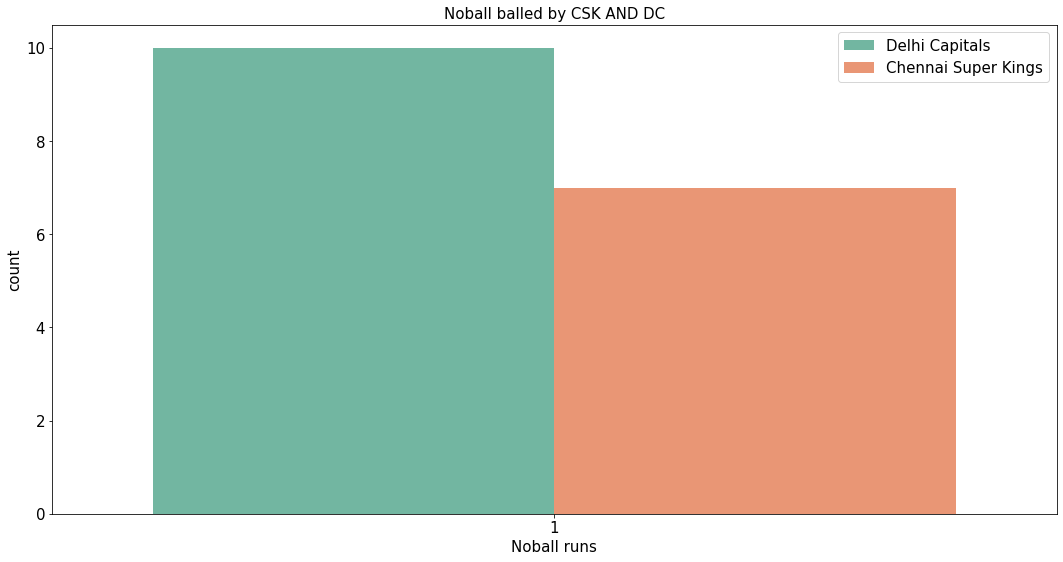

In [333]:
plt.figure(figsize = (18,9))
sns.countplot(nbcount['noball_runs'],palette='Set2',hue=nbcount['bowling_team'])
plt.title('Noball balled by CSK AND DC',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Noball runs',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.legend(loc=1,fontsize=15)

plt.show()

From the analysis we can predict 0-2 no ball to be bowled atmost